# Here We do Regression Algoritam With Python

In [1]:
import pandas as pd # for read dataset
import numpy as na # for numerical python
import matplotlib.pyplot as plt  # for plot the graph
import seaborn as sns # plot graphical

# Read the csv file with use of pandas in a varibale of ad

In [2]:
ad=pd.read_csv("SolarPrediction.csv")

In [4]:
ad.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
#Shape,info and describe
ad.shape
ad.info()
ad.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [9]:
#check the null value occure 
ad.isnull().any()

UNIXTime                  False
Data                      False
Time                      False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool

# Here we use simple linear regression so delete unnecessary columns

In [10]:
sp=ad.drop(['UNIXTime','Data','Time','Radiation','Pressure','WindDirection(Degrees)','Speed','TimeSunRise','TimeSunSet'],axis=1)

In [11]:
sp

,Temperature,Humidity
0,48,59
1,48,58
2,48,57
3,48,60
4,48,62
...,...,...
32681,44,102
32682,44,102
32683,44,102
32684,44,101


# Seperate the dependent and independent value in a variable of x and y

In [12]:
x=sp.iloc[:,0].values.reshape(-1,1)
y=sp.iloc[:,1].values.reshape(-1,1)

In [13]:
x

array([[48],
       [48],
       [48],
       ...,
       [44],
       [44],
       [44]], dtype=int64)

In [14]:
y

array([[ 59],
       [ 58],
       [ 57],
       ...,
       [102],
       [101],
       [101]], dtype=int64)

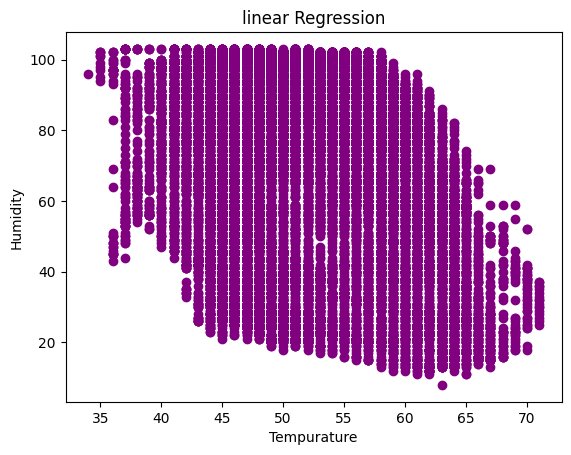

In [19]:
plt.scatter(x,y,color='purple')
plt.xlabel('Tempurature')
plt.ylabel('Humidity')
plt.title('linear Regression')
plt.show()

# Test and Train the dataset

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
x_train

array([[45],
       [57],
       [45],
       ...,
       [60],
       [46],
       [51]], dtype=int64)

In [25]:
y_train

array([[ 99],
       [ 32],
       [ 50],
       ...,
       [ 30],
       [101],
       [ 50]], dtype=int64)

In [26]:
#Testing variable are get randomelly

In [27]:
x_test

array([[61],
       [48],
       [60],
       ...,
       [51],
       [47],
       [48]], dtype=int64)

In [28]:
y_test

array([[ 16],
       [ 48],
       [ 23],
       ...,
       [100],
       [ 23],
       [101]], dtype=int64)

# Making Predictions


In [29]:
y_pred = regressor.predict(x_test)

In [30]:
y_pred

array([[63.2541794 ],
       [78.85791713],
       [64.45446692],
       ...,
       [75.25705458],
       [80.05820465],
       [78.85791713]])

In [33]:
final=pd.DataFrame(x_test,columns=['Temperature'])
final['Available Data']=y_test
final['Pridice Data']=y_pred

In [34]:
final

,Temperature,Available Data,Pridice Data
0,61,16,63.254179
1,48,48,78.857917
2,60,23,64.454467
3,44,97,83.659067
4,49,89,77.657630
...,...,...,...
9801,63,44,60.853604
9802,47,100,80.058205
9803,51,100,75.257055
9804,47,23,80.058205


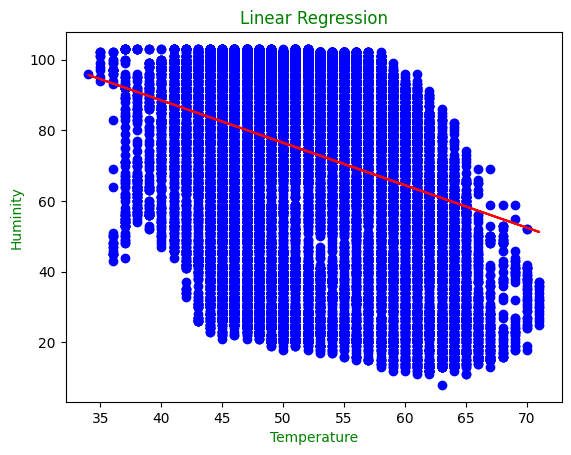

In [37]:
plt.scatter(x,y,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.xlabel('Temperature',color='green')
plt.ylabel('Huminity',color='green')
plt.title('Linear Regression',color='green')
plt.show()

In [40]:
mean_squared_error(y_test,y_pred)

632.8442776309752

In [42]:
mean_absolute_error(y_test,y_pred)

21.2774202549645